# **Import Library**

In [684]:
# importing critical modules
%%capture
import sys
import os

if 'google.colab' in sys.modules:
    !pip install idaes-pse --pre
    !idaes get-extensions --to ./bin 
    os.environ['PATH'] += ':bin'

In [685]:
# here is the zip file
!gdown 10XRvLZqrpSNiXVAN-pipU52BVRwoGcNQ

# before you do anything...
# mount your drive!
# click folder on the left...
# import modules

%matplotlib inline
from pylab import *

import shutil
import sys
import os.path

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

# if not (shutil.which("ipopt") or os.path.isfile("ipopt")):
#     if "google.colab" in sys.modules:
#         !wget -N -q "https://mate.unipv.it/gualandi/solvers/ipopt-linux64.zip"
#         !unzip -o -q ipopt-linux64
#         #!apt-get install -y -qq glpk-utils
#     else:
#         try:
#             !conda install -c conda-forge ipopt
#         except:
#             pass

assert(shutil.which("ipopt") or os.path.isfile("ipopt"))

from pyomo.environ import *

# # this is the file we just uploaded to the runtime
!unzip -o -q ipopt-linux64_dw
assert(shutil.which("ipopt") or os.path.isfile("ipopt"))

!wget -N -q "https://ampl.com/dl/open/bonmin/bonmin-linux64.zip"
!unzip -o -q bonmin-linux64

# https://drive.google.com/file/d/1Nixf7roe8lfi9U514jOrbqrCRDAHW77o/view?usp=share_link
!gdown 1Nixf7roe8lfi9U514jOrbqrCRDAHW77o

Downloading...
From: https://drive.google.com/uc?id=10XRvLZqrpSNiXVAN-pipU52BVRwoGcNQ
To: /content/ipopt-linux64_dw.zip
100% 1.82M/1.82M [00:00<00:00, 92.4MB/s]
[bonmin-linux64.zip]
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of bonmin-linux64 or
        bonmin-linux64.zip, and cannot find bonmin-linux64.ZIP, period.
Downloading...
From: https://drive.google.com/uc?id=1Nixf7roe8lfi9U514jOrbqrCRDAHW77o
To: /content/PortfolioAllocation_Data_Womack.csv
100% 1.14k/1.14k [00:00<00:00, 3.48MB/s]


In [686]:
# import modules
import pandas as pd
import numpy as np
from pylab import * 
import shutil
import sys
import os.path

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

if not shutil.which("ipopt"):
    # here is the IPOPT zip file
    !gdown 10XRvLZqrpSNiXVAN-pipU52BVRwoGcNQ
    !unzip -o -q ipopt-linux64_dw
    assert(shutil.which("ipopt") or os.path.isfile("ipopt"))

from pyomo.environ import *

SOLVER = 'ipopt'
EXECUTABLE = '/content/ipopt'
ipopt_executable = '/content/ipopt'

# some stock-specific packages
!pip install yahoo_fin
!pip install requests_html
import yahoo_fin.stock_info as si

!wget -N -q "https://ampl.com/dl/open/bonmin/bonmin-linux64.zip"
!unzip -o -q bonmin-linux64

# https://drive.google.com/file/d/1Nixf7roe8lfi9U514jOrbqrCRDAHW77o/view?usp=share_link
!gdown 1Nixf7roe8lfi9U514jOrbqrCRDAHW77o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[bonmin-linux64.zip]
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of bonmin-linux64 or
        bonmin-linux64.zip, and cannot find bonmin-linux64.ZIP, period.
Downloading...
From: https://drive.google.com/uc?id=1Nixf7roe8lfi9U514jOrbqrCRDAHW77o
To: /content/PortfolioAllocation_Data_Womack.csv
100% 1.14k/1.14k [00:00<00:00, 4.06MB/s]


# ***1: Data Preparation and EDA***


In [687]:
# some useful modules
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [688]:
# some stock-specific packages
!pip install yahoo_fin
!pip install requests_html
import yahoo_fin.stock_info as si

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## ***1.1 Data Retrieval and Cleaning***

In [689]:
#Assigning ticker that we want to scrape
tickers_list = ['PODD','DXCM','TMO','EL','KDP','MKC','COP','HES','OKE']
#Use historical price data for each stocks to later compare with our new score later
dow_prices = {ticker : si.get_data(ticker,start_date = '01/01/2017',end_date='12/31/2021',interval='1d') for ticker in tickers_list}

/usr/local/lib/python3.10/dist-packages/yahoo_fin/stock_info.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame['ticker'] = ticker.upper()


In [690]:
#Here you are able to see the information of each ticker price and they perform in the market
dow_prices

{'PODD':                   open        high         low       close    adjclose  \
 2017-01-03   38.139999   38.290001   37.220001   37.349998   37.349998   
 2017-01-04   37.430000   37.680000   36.860001   37.599998   37.599998   
 2017-01-05   37.730000   38.270000   36.799999   36.980000   36.980000   
 2017-01-06   38.119999   39.240002   37.480000   37.900002   37.900002   
 2017-01-09   37.990002   38.549999   37.700001   38.290001   38.290001   
 ...                ...         ...         ...         ...         ...   
 2021-12-23  270.000000  276.010010  266.440002  273.260010  273.260010   
 2021-12-27  274.779999  276.250000  269.809998  272.760010  272.760010   
 2021-12-28  274.350006  274.459991  262.420013  266.170013  266.170013   
 2021-12-29  266.170013  270.970001  265.000000  270.190002  270.190002   
 2021-12-30  269.970001  275.890015  269.100006  269.570007  269.570007   
 
             volume ticker  
 2017-01-03  524600   PODD  
 2017-01-04  479100   PODD  
 20

### ***1.1.1: Pulling data in a data frame***

In [691]:
#Now we are only exctracting the data that we need. (adjclose)
#Then we get the adjclose price for the PODD (one sample)
prep_data = pd.DataFrame(dow_prices['PODD']['adjclose']).rename(columns = {"adjclose":"PODD"})

#After that we combine all the tickers (all the rest of the samples)
for i in tickers_list[1:]:
  prep_data[i] = pd.DataFrame(dow_prices[i]['adjclose'])
prep_data

,PODD,DXCM,TMO,EL,KDP,MKC,COP,HES,OKE
2017-01-03,37.349998,14.562500,141.354477,72.731895,12.810677,42.182529,41.664692,56.335880,38.976158
2017-01-04,37.599998,15.180000,142.820480,74.020447,12.871308,42.060833,42.051636,55.537746,38.876640
2017-01-05,36.980000,15.665000,143.036957,73.926392,12.882587,41.236019,41.928146,55.690197,39.029228
2017-01-06,37.900002,15.807500,144.896469,74.453094,12.820547,41.195465,41.771736,55.510838,38.412254
2017-01-09,38.290001,15.622500,145.112900,73.587784,12.765561,40.627556,40.882622,54.353989,38.133614
...,...,...,...,...,...,...,...,...,...
2021-12-23,273.260010,143.002502,648.845642,361.398621,34.806561,90.609688,66.883736,72.324203,53.830406
2021-12-27,272.760010,142.470001,660.322815,364.637482,34.971203,91.681061,68.781555,74.410576,55.120041
2021-12-28,266.170013,132.375000,653.512268,363.185913,35.223003,92.489471,68.696999,74.085808,55.110756
2021-12-29,270.190002,133.850006,660.841370,365.437317,35.426380,93.132309,68.509087,73.485481,54.526253


In [692]:
#This allows us to see the shape of the current data
prep_data.shape

(1258, 9)

### ***1.1.2: Dropping NA values from the data frame***

In [693]:
#Now we will create the return features for each ticker. 
#Then we will just use a pct_change as the return.
return_data = pd.DataFrame()
for i in tickers_list:
  return_data[i] = prep_data[i].pct_change()
#We will also drop any of the na records.
return_data.dropna(inplace=True)
return_data

,PODD,DXCM,TMO,EL,KDP,MKC,COP,HES,OKE
2017-01-04,0.006693,0.042403,0.010371,0.017716,0.004733,-0.002885,0.009287,-0.014167,-0.002553
2017-01-05,-0.016489,0.031950,0.001516,-0.001271,0.000876,-0.019610,-0.002937,0.002745,0.003925
2017-01-06,0.024878,0.009097,0.013000,0.007125,-0.004816,-0.000983,-0.003730,-0.003221,-0.015808
2017-01-09,0.010290,-0.011703,0.001494,-0.011622,-0.004289,-0.013786,-0.021285,-0.020840,-0.007254
2017-01-10,0.075999,0.072812,0.001967,-0.011375,-0.005081,-0.003883,0.000000,0.013859,-0.024530
...,...,...,...,...,...,...,...,...,...
2021-12-23,0.014366,-0.001362,-0.001534,0.011861,0.001951,-0.003855,0.001547,-0.008366,0.004154
2021-12-27,-0.001830,-0.003724,0.017689,0.008962,0.004730,0.011824,0.028375,0.028847,0.023957
2021-12-28,-0.024160,-0.070857,-0.010314,-0.003981,0.007200,0.008818,-0.001229,-0.004365,-0.000168
2021-12-29,0.015103,0.011143,0.011215,0.006199,0.005774,0.006950,-0.002735,-0.008103,-0.010606


In [694]:
#Now let's see return data shape.
return_data.shape

(1257, 9)

## ***1.2: Time Series Visualizations***






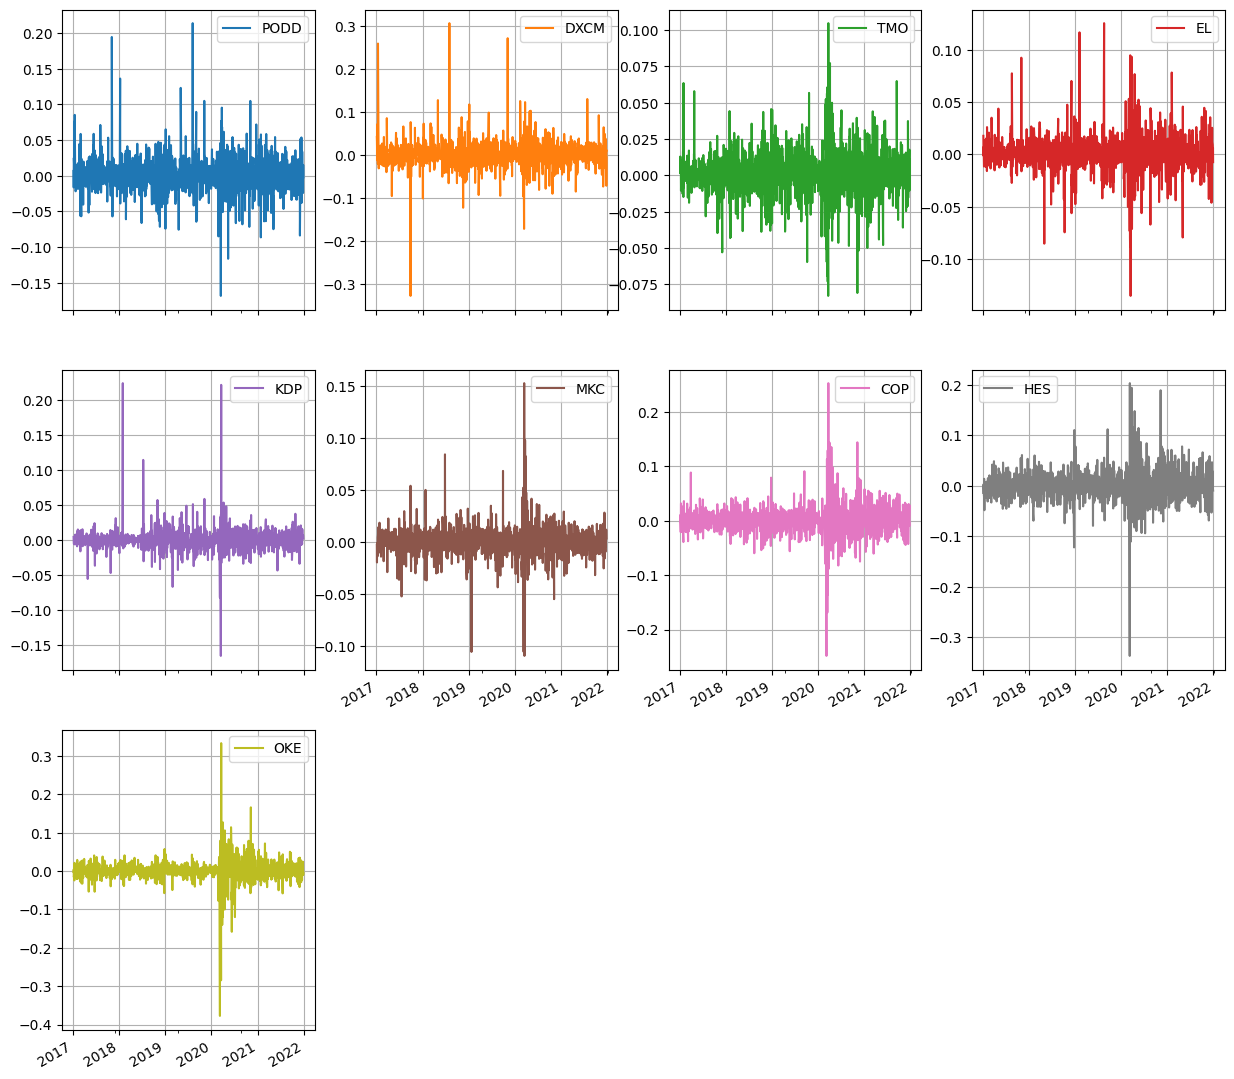

In [695]:
return_data.plot(subplots=True,
        grid=True, 
        layout=(3,4),
         figsize=(15,15))
plt.show()

### ***1.2.1: Visualization of Pharma Sector***

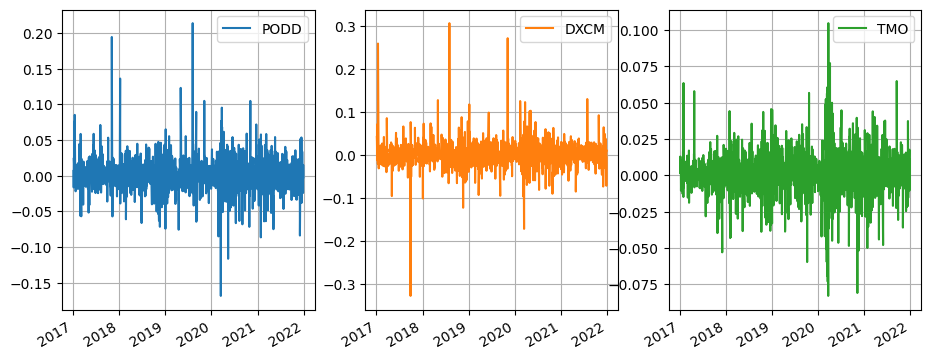

In [696]:
pharma = return_data.iloc[:,:3]
pharma


pharma.plot(subplots=True,
        grid=True, 
        layout=(3,4),
         figsize=(15,15))
plt.show()

### ***1.2.2: Visualization of Consumer Staples Sector***

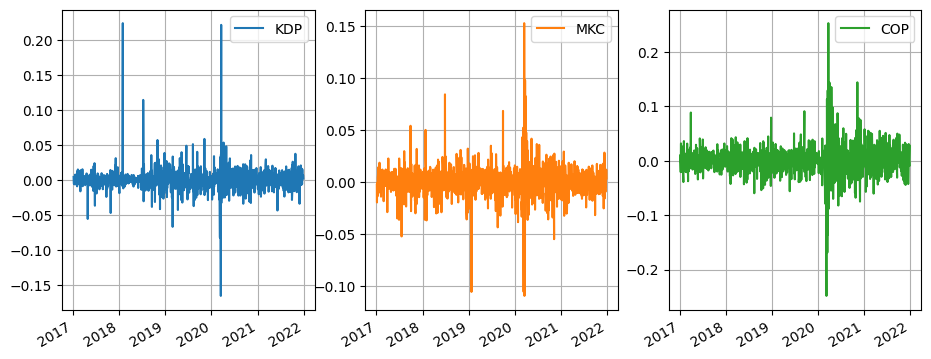

In [697]:
consumer = return_data.iloc[:,4:7]
consumer


consumer.plot(subplots=True,
        grid=True, 
        layout=(3,4),
         figsize=(15,15))
plt.show()


### ***1.2.3: Visualization of Energy Sector***

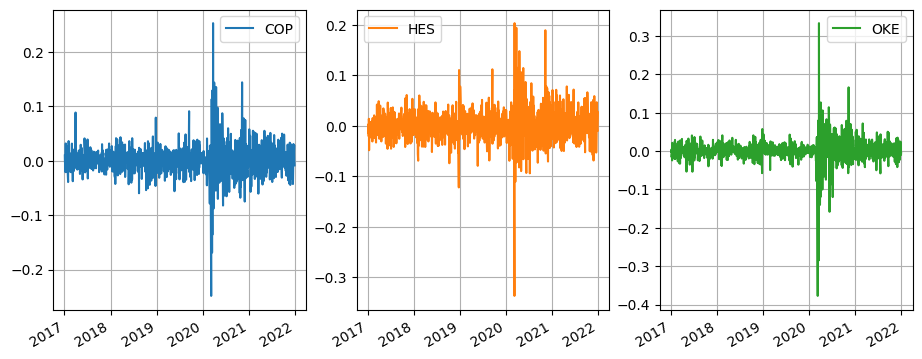

In [698]:
energy = return_data.iloc[:,-3:]
energy


energy.plot(subplots=True,
        grid=True, 
        layout=(3,4),
         figsize=(15,15))
plt.show()

## ***1.3: Discussion of the Plots***

# ***2: Optimization Model***



### ***Renaming the data frame for ease of re-usability***

In [699]:
# Rename the dataFrame for easy usability
df = return_data
df

,PODD,DXCM,TMO,EL,KDP,MKC,COP,HES,OKE
2017-01-04,0.006693,0.042403,0.010371,0.017716,0.004733,-0.002885,0.009287,-0.014167,-0.002553
2017-01-05,-0.016489,0.031950,0.001516,-0.001271,0.000876,-0.019610,-0.002937,0.002745,0.003925
2017-01-06,0.024878,0.009097,0.013000,0.007125,-0.004816,-0.000983,-0.003730,-0.003221,-0.015808
2017-01-09,0.010290,-0.011703,0.001494,-0.011622,-0.004289,-0.013786,-0.021285,-0.020840,-0.007254
2017-01-10,0.075999,0.072812,0.001967,-0.011375,-0.005081,-0.003883,0.000000,0.013859,-0.024530
...,...,...,...,...,...,...,...,...,...
2021-12-23,0.014366,-0.001362,-0.001534,0.011861,0.001951,-0.003855,0.001547,-0.008366,0.004154
2021-12-27,-0.001830,-0.003724,0.017689,0.008962,0.004730,0.011824,0.028375,0.028847,0.023957
2021-12-28,-0.024160,-0.070857,-0.010314,-0.003981,0.007200,0.008818,-0.001229,-0.004365,-0.000168
2021-12-29,0.015103,0.011143,0.011215,0.006199,0.005774,0.006950,-0.002735,-0.008103,-0.010606


## ***2.1: Model execution***

### ***2.1.1: Calculating the return and standard deviation of each stock***

In [700]:
# Calculate the average return for each stock
Avg_Return = pd.DataFrame(np.mean(df) ,columns=["Avg_Return"])
print(Avg_Return)

# Calculate the standard deviation of return for each stock
Std_Dev_Return = pd.DataFrame(np.std(df) ,columns=["Std_Dev_Return"])
print(Std_Dev_Return)

      Avg_Return
PODD    0.001896
DXCM    0.002262
TMO     0.001360
EL      0.001442
KDP     0.000945
MKC     0.000747
COP     0.000738
HES     0.000691
OKE     0.000730
      Std_Dev_Return
PODD        0.025507
DXCM        0.031265
TMO         0.016085
EL          0.018053
KDP         0.016596
MKC         0.015102
COP         0.026358
HES         0.030956
OKE         0.029714


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


### ***2.1.2: Plotting the covariance matrix***

In [701]:
# here's the covariance matrix
Covariance_matrix = df.cov()
Covariance_matrix

,PODD,DXCM,TMO,EL,KDP,MKC,COP,HES,OKE
PODD,0.000651,0.000405,0.000140,0.000131,0.000076,0.000059,0.000121,0.000141,0.000158
DXCM,0.000405,0.000978,0.000157,0.000130,0.000105,0.000075,0.000151,0.000174,0.000148
TMO,0.000140,0.000157,0.000259,0.000112,0.000043,0.000103,0.000096,0.000112,0.000070
EL,0.000131,0.000130,0.000112,0.000326,0.000074,0.000092,0.000190,0.000209,0.000192
KDP,0.000076,0.000105,0.000043,0.000074,0.000276,0.000059,0.000120,0.000091,0.000174
MKC,0.000059,0.000075,0.000103,0.000092,0.000059,0.000228,0.000077,0.000078,0.000049
COP,0.000121,0.000151,0.000096,0.000190,0.000120,0.000077,0.000695,0.000657,0.000576
HES,0.000141,0.000174,0.000112,0.000209,0.000091,0.000078,0.000657,0.000959,0.000613
OKE,0.000158,0.000148,0.000070,0.000192,0.000174,0.000049,0.000576,0.000613,0.000884


### ***2.1.3: Plotting the correlation matrix***

In [702]:
# here's the correlation matrix
import seaborn as sns
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')

,PODD,DXCM,TMO,EL,KDP,MKC,COP,HES,OKE
PODD,1.000000,0.507457,0.341523,0.283194,0.179928,0.154224,0.180092,0.178053,0.208935
DXCM,0.507457,1.000000,0.311523,0.230282,0.202370,0.158584,0.183657,0.179518,0.158918
TMO,0.341523,0.311523,1.000000,0.383934,0.161256,0.421760,0.226315,0.225635,0.147176
EL,0.283194,0.230282,0.383934,1.000000,0.245923,0.338672,0.398876,0.373990,0.358384
KDP,0.179928,0.202370,0.161256,0.245923,1.000000,0.235072,0.273353,0.176260,0.352514
MKC,0.154224,0.158584,0.421760,0.338672,0.235072,1.000000,0.193008,0.166117,0.108989
COP,0.180092,0.183657,0.226315,0.398876,0.273353,0.193008,1.000000,0.805180,0.735457
HES,0.178053,0.179518,0.225635,0.373990,0.176260,0.166117,0.805180,1.000000,0.665460
OKE,0.208935,0.158918,0.147176,0.358384,0.352514,0.108989,0.735457,0.665460,1.000000


### ***2.1.4: Covariance table and average return table***

In [703]:
# Creating covariance table on stock return dataframe

df_cov = df.cov()
print('Covariance Matrix:')
print(df_cov)
print('\n') # return/blank line

# Create the average of each stock
# These are the objective function COEFFICIENTS!
df_return = df.mean()
print('Average Return:')
print(df_return)

Covariance Matrix:
          PODD      DXCM       TMO        EL       KDP       MKC       COP  \
PODD  0.000651  0.000405  0.000140  0.000131  0.000076  0.000059  0.000121   
DXCM  0.000405  0.000978  0.000157  0.000130  0.000105  0.000075  0.000151   
TMO   0.000140  0.000157  0.000259  0.000112  0.000043  0.000103  0.000096   
EL    0.000131  0.000130  0.000112  0.000326  0.000074  0.000092  0.000190   
KDP   0.000076  0.000105  0.000043  0.000074  0.000276  0.000059  0.000120   
MKC   0.000059  0.000075  0.000103  0.000092  0.000059  0.000228  0.000077   
COP   0.000121  0.000151  0.000096  0.000190  0.000120  0.000077  0.000695   
HES   0.000141  0.000174  0.000112  0.000209  0.000091  0.000078  0.000657   
OKE   0.000158  0.000148  0.000070  0.000192  0.000174  0.000049  0.000576   

           HES       OKE  
PODD  0.000141  0.000158  
DXCM  0.000174  0.000148  
TMO   0.000112  0.000070  
EL    0.000209  0.000192  
KDP   0.000091  0.000174  
MKC   0.000078  0.000049  
COP   0.000

### ***2.1.5: Calculating the risk matrix***

In [704]:
# Creating calculations table for calculating the risk
# Max risk should be less than 0.005

max_risk = 0.005

def calc_risk(m):
  variables = m.a1, m.a2, m.a3, m.a4, m.a5, m.a6, m.a7, m.a8, m.a9
  tickers = tickers_list
  risk_exp = 0
  for i in range(len(variables)):
    for j in range(len(variables)):
      risk_exp += variables[i]*df_cov.at[tickers[i],tickers[j]]*variables[j]
  return risk_exp

# We are going to use this expression to compute the risk
expr_risk = calc_risk(m)

# Defining risk limits, with the least 0.0001 to the most 0.005, step 0.00004. 
# This is a sequence of options - better!
risk_limits = np.arange(0.0001, 0.005, 0.00004) 

### ***2.1.6: Creating the model***

In [705]:
# Creating the model
m = ConcreteModel()

# Declaring new variable names to above decision varaibles for better use of substitution
m.a1 =  Var(within=NonNegativeReals, bounds=(0,1)) # Insulet
m.a2 =  Var(within=NonNegativeReals, bounds=(0,1)) # Dexcom
m.a3 =  Var(within=NonNegativeReals, bounds=(0,1)) # Thermo Fisher
m.a4 =  Var(within=NonNegativeReals, bounds=(0,1)) # Estee Lauder
m.a5 =  Var(within=NonNegativeReals, bounds=(0,1)) # Keurig Dr Pepper
m.a6 =  Var(within=NonNegativeReals, bounds=(0,1)) # McCormick
m.a7 =  Var(within=NonNegativeReals, bounds=(0,1)) # ConocoPhillips
m.a8 =  Var(within=NonNegativeReals, bounds=(0,1)) # Hess Corp
m.a9 =  Var(within=NonNegativeReals, bounds=(0,1)) # Oneok

# Declaring another set of binary variables to select or not select the stocks
m.b1 = Var(within = Binary) # Insulet
m.b2 = Var(within = Binary) # Dexcom
m.b3 = Var(within = Binary) # Thermo Fisher
m.b4 = Var(within = Binary) # Estee Lauder
m.b5 = Var(within = Binary) # Keurig Dr Pepper
m.b6 = Var(within = Binary) # McCormick
m.b7 = Var(within = Binary) # ConocoPhillips
m.b8 = Var(within = Binary) # Hess Corp
m.b9 = Var(within = Binary) # Oneok

# Declare objective
m.objective = Objective(expr =               
                       m.a1*m.b1*df_return[0] + 
                       m.a2*m.b2*df_return[1] + 
                       m.a3*m.b3*df_return[2] +
                       m.a4*m.b4*df_return[3] + 
                       m.a5*m.b5*df_return[4]+
                       m.a6*m.b6*df_return[5]+
                       m.a7*m.b7*df_return[6]+
                       m.a8*m.b8*df_return[7]+
                       m.a9*m.b9*df_return[8],
                        sense=maximize) # yes, we want to MAX our returns!

# Declare constraints

# 1. Sum of all porportions = 1
m.c1 = Constraint(expr = m.a1 + m.a2  + m.a3 + m.a4 + m.a5 + m.a6 + m.a7 + m.a8 + m.a9 == 1)

# 2. Set minimum risk
m.c2 = Constraint(expr = m.a1 + m.a2  + m.a3 + m.a4  + m.a5 + m.a6 + m.a7 + m.a8 + m.a9 >= 0.0)

# 3. Selecting at least one stock from each of the categories
m.c3 = Constraint(expr = m.b1 + m.b2 + m.b3 == 1)
m.c4 = Constraint(expr = m.b4 + m.b5 + m.b6 == 1) 
m.c5 = Constraint(expr = m.b7 + m.b8 + m.b9 == 1)

# 4. Add linking constraint to cap max investment in stock basis binary variables
# m.l1 = Constraint(expr = m.a1*m.b1 + m.a2*m.b2 + m.a3*m.b3 + m.a4*m.b4 + m.a5*m.b5 + m.a6*m.b6 + m.a7*m.b7 + m.a8*m.b8 + m.a9*m.b9 == 1) # All stocks
m.l1 = Constraint(expr = m.a1 - 1*m.b1 <= 0) # Insulet
m.l2 = Constraint(expr = m.a2 - 1*m.b2 <= 0) # Dexcom
m.l3 = Constraint(expr = m.a3 - 1*m.b3 <= 0) # Thermo Fisher
m.l4 = Constraint(expr = m.a4 - 1*m.b4 <= 0) # Estee Lauder
m.l5 = Constraint(expr = m.a5 - 1*m.b5 <= 0) # Keurig Dr Pepper
m.l6 = Constraint(expr = m.a6 - 1*m.b6 <= 0) # McCormick
m.l7 = Constraint(expr = m.a7 - 1*m.b7 <= 0) # ConocoPhillips
m.l8 = Constraint(expr = m.a8 - 1*m.b8 <= 0) # Hess Corp
m.l9 = Constraint(expr = m.a9 - 1*m.b9 <= 0) # Oneok

In [706]:
options = {'bonmin': {'memory_limit': 4000}}

### ***2.1.7: Running the model***

In [721]:
# Updating risk contraint for each limit and then solving the problem
from pyomo.opt import SolverStatus, TerminationCondition

param_analysis = {} # key=risk, value = stock allocations 
returns = {} # key=risk, value = return

for r in risk_limits:

  m.del_component(m.c2)
  m.c2 = Constraint(expr = expr_risk <= r)

  # Run solver
  try:
    result = SolverFactory('bonmin', executable='/content/bin/bonmin').solve(m).write()

    # Store our allocation proportions
    param_analysis[r] = [m.a1(), m.a2(), m.a3(), m.a4(), m.a5(), m.a6(), m.a7(), m.a8(), m.a9()]

    # Store our returns
    # returns[r] =  m.a1*df_return[0] + m.a2*df_return[1] + m.a3*df_return[2] + m.a4*df_return[3] + m.a5*df_return[4] +  m.a6*df_return[5] + m.a7*df_return[6] + m.a8*df_return[7] + m.a9*df_return[8]
    returns[r] = m.objective()

  # Remove infeasible solutions
  except:

    print('Infeasible solution!')
    continue # Check for the next risk level


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 27
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.05090808868408203
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# ==========================

## ***2.2: Plot with allocation of the stocks***

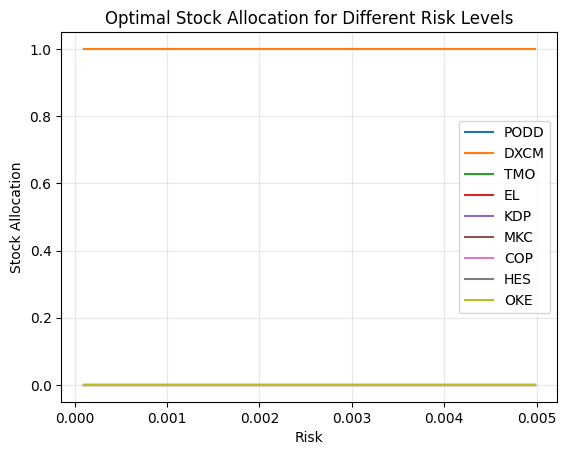

In [722]:
# generating the dataframe for proportions of the portfolio for each risk limit
param_analysis = pd.DataFrame.from_dict(param_analysis, orient='index')
param_analysis.columns = ['PODD','DXCM','TMO','EL','KDP','MKC','COP','HES','OKE']
param_analysis.plot()
plt.title('Optimal Stock Allocation for Different Risk Levels')
xlabel('Risk')
ylabel('Stock Allocation')
plt.grid(True, alpha = .3)
plt.show()

## ***2.3: Plot with efficient frontier***

In [723]:
# subset
risk = list(returns.keys()) # coerce dict_keys to a list
print(risk)

reward = list(returns.values()) # coerce dict_values to a list
print(reward) # we aren't allowed to name our value 'return' - this is a reserved name.

[0.0001, 0.00014000000000000001, 0.00018000000000000004, 0.00022000000000000003, 0.00026000000000000003, 0.00030000000000000003, 0.0003400000000000001, 0.0003800000000000001, 0.00042000000000000007, 0.00046000000000000007, 0.0005000000000000001, 0.0005400000000000001, 0.0005800000000000001, 0.0006200000000000002, 0.0006600000000000002, 0.0007000000000000002, 0.0007400000000000002, 0.0007800000000000002, 0.0008200000000000002, 0.0008600000000000002, 0.0009000000000000002, 0.0009400000000000003, 0.0009800000000000002, 0.0010200000000000003, 0.0010600000000000002, 0.0011000000000000003, 0.0011400000000000004, 0.0011800000000000003, 0.0012200000000000004, 0.0012600000000000003, 0.0013000000000000004, 0.0013400000000000003, 0.0013800000000000004, 0.0014200000000000005, 0.0014600000000000004, 0.0015000000000000005, 0.0015400000000000004, 0.0015800000000000005, 0.0016200000000000003, 0.0016600000000000005, 0.0017000000000000003, 0.0017400000000000004, 0.0017800000000000005, 0.0018200000000000

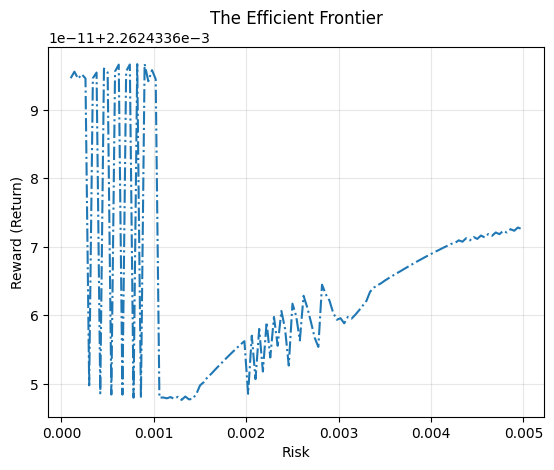

In [724]:
# Plot the graph

from pylab import *
plot(risk, reward, '-.')
title('The Efficient Frontier')
xlabel('Risk')
ylabel('Reward (Return)')
plt.grid(True, alpha = .3)
plt.show()

## ***2.4: Portfolio selection***

#### ***As seen from above efficiency frontier, considering lower risks with a diverse set of portfolio, we went ahead to select stocks from lower risk levels of 0.0002 to 0.0003***. 

In [725]:
# Showing the results
print(round(m.b1(),2))
print(round(m.b2(),2))
print(round(m.b3(),2))
print(round(m.b4(),2))
print(round(m.b5(),2))
print(round(m.b6(),2))
print(round(m.b7(),2))
print(round(m.b8(),2))
print(round(m.b9(),2))

0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0


In [726]:
print(round(m.a1(),2))
print(round(m.a2(),2))
print(round(m.a3(),2))
print(round(m.a4(),2))
print(round(m.a5(),2))
print(round(m.a6(),2))
print(round(m.a7(),2))
print(round(m.a8(),2))
print(round(m.a9(),2))

0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [727]:
# Showing stock allocations for risk levels from 0.0002 to 0.0003
round(param_analysis[0.0002:0.0005], 3)

,PODD,DXCM,TMO,EL,KDP,MKC,COP,HES,OKE
0.00022,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.00026,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.00030,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.00034,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.00038,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.00042,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.00046,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### We decided to select on the below stocks:
- 39.14 % in PODD for Pharma sector
- 6.23% is in EL for Consumer Staples sector
- 54.63% is in HES for Energy sector

In [750]:
# Setting the variables with above stock allocations to decide on the strategy:

podd_stock = 0.3914
el_stock = 0.0623
hes_stock = 0.5463

# Total investment fund
invest_fund = 100000

# Calculate the investment in each stock
PODD_invest = podd_stock*invest_fund
print("Invest in PODD: $" + str(round(podd_invest, 2)))
EL_invest = el_stock*invest_fund
print("Invest in EL: $" + str(round(el_invest, 2)))
HES_invest = hes_stock*invest_fund
print("Invest in HES: $" + str(round(hes_invest, 2)))

Invest in PODD: $39140.0
Invest in EL: $6230.0
Invest in HES: $52930.0


# ***3: Analyis***

In [854]:
# Loading data from 2022
# Start date: 12/2/2021 as we need data of last 21 days as on 1st Jan
# End date: 1/1/2023 as we need data until end of the year - full Dec

tickers_select = ['PODD', 'EL', 'HES']
df = {ticker : si.get_data(ticker,start_date = '12/2/2021',end_date='1/1/2023',interval='1d') for ticker in tickers_select}

# Assigning first days basis actual trading days
first_days = ['2022-01-03','2022-02-01','2022-03-01','2022-04-01','2022-05-02','2022-06-01', '2022-07-01','2022-08-01','2022-09-01','2022-10-03','2022-11-01','2022-12-01']

In [855]:
# Loading data for PODD

print("Health Sector")
ticker = "PODD"
podd = si.get_data(ticker,start_date = '12/2/2021',end_date='1/1/2023',interval='1d')
day = np.arange(1, len(podd) + 1) #generate list of trading days
podd['Day'] = day
# Dropping columns I don't want to use
podd.drop(columns=['adjclose', 'volume','ticker'], inplace = True)
# Reorganizing the columns
PODD = podd[['Day', 'open', 'high', 'low', 'close']]
# Renaming the columns
PODD.columns = ['Day', 'Open', 'High', 'Low', 'Close']
print(PODD.head())

# Loading data for EL

print("\n"," Consumer staples")
ticker1 = "EL"
el = si.get_data(ticker1,start_date =  '12/2/2021',end_date='1/1/2023',interval='1d')
day = np.arange(1, len(el) + 1) #generate list of trading days
el['Day'] = day
# Dropping columns I don't want to use
el.drop(columns=['adjclose', 'volume','ticker'], inplace = True)
# Reorganizing the columns
EL = el[['Day', 'open', 'high', 'low', 'close']]
# Renaming the columns
EL.columns = ['Day', 'Open', 'High', 'Low', 'Close']
print(EL.head())

# Loading data for HES

print("\n"," Energy Sector")
ticker2 = "HES"
hes= si.get_data(ticker2,start_date =  '12/2/2021',end_date='1/1/2023',interval='1d')
day = np.arange(1, len(hes) + 1) #generate list of trading days
hes['Day'] = day
# Dropping columns I don't want to use
hes.drop(columns=['adjclose', 'volume','ticker'], inplace = True)
# Reorganizing the columns
HES = hes[['Day', 'open', 'high', 'low', 'close']]
# Renaming the columns
HES.columns = ['Day', 'Open', 'High', 'Low', 'Close']
print(hes.head())


Health Sector
            Day        Open        High         Low       Close
2021-12-02    1  282.750000  289.000000  281.690002  287.239990
2021-12-03    2  289.579987  292.739990  250.759995  263.170013
2021-12-06    3  263.200012  271.809998  256.679993  259.140015
2021-12-07    4  264.500000  273.570007  262.459991  272.500000
2021-12-08    5  275.000000  284.709991  269.690002  277.130005

  Consumer staples
            Day        Open        High         Low       Close
2021-12-02    1  327.660004  336.510010  326.510010  334.670013
2021-12-03    2  339.299988  347.350006  330.190002  335.299988
2021-12-06    3  337.579987  343.709991  337.329987  341.549988
2021-12-07    4  347.250000  357.739990  347.250000  353.640015
2021-12-08    5  353.600006  357.000000  351.230011  356.149994

  Energy Sector
                 open       high        low      close  Day
2021-12-02  72.730003  77.720001  71.059998  77.139999    1
2021-12-03  78.599998  78.790001  75.199997  75.879997    2
2

## ***3.1: Buy-and-Hold strategy for the MPT portfolio***

In [856]:
# Creating Buy and hold data details
Buy_Hold = pd.DataFrame()


# Storing prices for closing from 1st Jan onwards
Buy_Hold['PODD_Shareprice'] = df['PODD']['close']
Buy_Hold['EL_Shareprice'] = df['EL']['close']
Buy_Hold['HES_Shareprice'] = df['HES']['close']


# Capturing data from 1st Jan
Buy_Hold.loc['2022-1-1'::]


# Assuming we bought it on first trading day of Jan which is 3rd, storing the stock prices in below variables
Price_PODD_Buy = Buy_Hold['PODD_Shareprice'].loc['2022-1-3']
Price_EL_Buy = Buy_Hold['EL_Shareprice'].loc['2022-1-3']
Price_HES_Buy = Buy_Hold['HES_Shareprice'].loc['2022-1-3']


# Calculating total number of stocks
PODD_share = PODD_invest / Price_PODD_Buy
EL_share = EL_invest / Price_EL_Buy
HES_share = HES_invest / Price_HES_Buy


# Creating column with investment and for all the stocks in Buy and Hold data frame
Buy_Hold['PODD_Investment'] = Buy_Hold['PODD_Shareprice'] * PODD_share
Buy_Hold['EL_Investment'] = Buy_Hold['EL_Shareprice'] * EL_share
Buy_Hold['HES_Investment'] = Buy_Hold['HES_Shareprice'] * HES_share


# Aggregating the above values to show total portfolio value at day level
Buy_Hold["Portfolio Value"] = Buy_Hold['PODD_Investment'] + Buy_Hold['EL_Investment'] + Buy_Hold['HES_Investment']


# Creating a column that shows tota return
Buy_Hold['Return'] = Buy_Hold["Portfolio Value"]  - invest_fund 

# Printing the outputs post dropping non - required columns
Buy_Hold = Buy_Hold.loc[first_days].copy().reset_index()
Buy_Hold = Buy_Hold.drop(['PODD_Shareprice','EL_Shareprice','HES_Shareprice'], axis = 1)

In [857]:
# Printig the data frame showing results for Investment / Value and Return
Buy_Hold.rename(columns = {"index":"First Day"}, inplace = True)
Buy_Hold

,First Day,PODD_Investment,EL_Investment,HES_Investment,Portfolio Value,Return
0,2022-01-03,39140.000000,6230.000000,54630.000000,100000.000000,0.000000
1,2022-02-01,35218.900405,5300.101235,66517.840072,107036.841712,7036.841712
2,2022-03-01,37030.384493,4804.951892,72138.065078,113973.401462,13973.401462
3,2022-04-01,39611.323491,4616.852422,77537.745961,121765.921874,21765.921874
4,2022-05-02,35089.710918,4385.008758,72835.254373,112309.974048,12309.974048
5,2022-06-01,29440.888762,4213.228963,90670.572344,124324.690069,24324.690069
6,2022-07-01,32149.598369,4315.859177,74976.632348,111442.089894,11442.089894
7,2022-08-01,34878.180949,4601.710339,77359.890773,116839.782061,16839.782061
8,2022-09-01,36844.409512,4226.015605,82844.944100,123915.369217,23915.369217
9,2022-10-03,33073.795590,3686.112630,83093.945704,119853.853924,19853.853924


#### ***Conclusion: We gain 49624$ at the end!!!***

## ***3.2: Momentum trading strategy for each stock in the MPT portfolio***

#### ***3.2.1: PODD***

In [858]:
# Using the data frame created earlier, create a new data frame to evaluate 8 day and 21 day moving averages

PODD1 = df['PODD'].copy()
PODD1['Log Close'] = np.log(PODD1['close'])
PODD1['Return'] = PODD1['Log Close'].diff()
PODD1['8-day'] = PODD1['close'].rolling(8).mean().shift()
PODD1['21-day'] = PODD1['close'].rolling(21).mean().shift()
PODD1.dropna(inplace=True)
PODD1.head(n=10)

,open,high,low,close,adjclose,volume,ticker,Log Close,Return,8-day,21-day
2022-01-03,264.799988,276.209991,263.920013,275.700012,275.700012,395300,PODD,5.619313,0.035554,269.122509,267.163814
2022-01-04,276.779999,282.869995,268.309998,273.549988,273.549988,393400,PODD,5.611484,-0.007829,270.388760,266.614291
2022-01-05,272.010010,277.230011,255.029999,255.449997,255.449997,446200,PODD,5.543027,-0.068458,270.908756,267.108576
2022-01-06,252.789993,263.679993,249.500000,260.429993,260.429993,741900,PODD,5.562334,0.019307,268.682505,266.932861
2022-01-07,257.519989,260.690002,249.729996,250.080002,250.080002,435000,PODD,5.521781,-0.040553,267.141253,266.358098
2022-01-10,245.000000,245.979996,231.860001,240.699997,240.699997,647800,PODD,5.483551,-0.038230,265.130001,265.070003
2022-01-11,241.070007,247.149994,235.679993,245.669998,245.669998,429400,PODD,5.503989,0.020438,261.443750,263.746193
2022-01-12,250.529999,251.619995,242.270004,242.779999,242.779999,320000,PODD,5.492156,-0.011833,258.456249,262.943813
2022-01-13,242.029999,249.850006,236.160004,242.369995,242.369995,625900,PODD,5.490465,-0.001690,255.544998,261.904765
2022-01-14,240.690002,243.149994,235.759995,242.710007,242.710007,1017900,PODD,5.491867,0.001402,251.378746,261.288098


In [859]:
# Checking on investment if moving 8 day average is better than 21 day average

PODD1['Yes_Invest'] = np.where(PODD1['8-day'] > PODD1['21-day'], 1, 0)
print(PODD1['Yes_Invest'].value_counts()) 

1    141
0    110
Name: Yes_Invest, dtype: int64


##### ***3.2.1.1: Strategy on entering or leaving the market:***

In [860]:
PODD1['Signal'] = PODD1['Yes_Invest'].diff()
PODD1.loc["2022-01-03",'Signal'] = 1 # Buy PODD on the first trading day basis signal

# Checking on how many days would we invest in the stock
print(PODD1['Signal'].value_counts()) 

# 1 - Means invest - YES
# 0 - Means - Do nothing
# -1 Means - NO - move out

 0.0    235
 1.0      8
-1.0      8
Name: Signal, dtype: int64


In [861]:
# Checking on trading days

PODD1[PODD1['Signal'].isin([1,-1])]

,open,high,low,close,adjclose,volume,ticker,Log Close,Return,8-day,21-day,Yes_Invest,Signal
2022-01-03,264.799988,276.209991,263.920013,275.700012,275.700012,395300,PODD,5.619313,0.035554,269.122509,267.163814,1,1.0
2022-01-11,241.070007,247.149994,235.679993,245.669998,245.669998,429400,PODD,5.503989,0.020438,261.443750,263.746193,0,-1.0
2022-02-08,241.360001,248.410004,236.580002,247.690002,247.690002,287300,PODD,5.512178,0.021053,237.842501,234.592858,1,1.0
2022-03-01,261.600006,265.959991,258.209991,260.839996,260.839996,340300,PODD,5.563907,-0.014652,246.888748,247.040952,0,-1.0
2022-03-03,272.440002,278.670013,264.679993,265.390015,265.390015,1132900,PODD,5.581200,-0.019848,251.689997,249.562856,1,1.0
2022-03-15,213.130005,217.460007,210.500000,216.070007,216.070007,992300,PODD,5.375602,0.019205,244.597498,248.161902,0,-1.0
2022-03-28,250.649994,255.630005,248.460007,253.429993,253.429993,314700,PODD,5.535088,0.005897,249.626251,248.974761,1,1.0
2022-04-25,248.000000,255.490005,247.729996,251.389999,251.389999,295600,PODD,5.527006,0.008028,261.843750,263.026191,0,-1.0
2022-06-01,216.250000,220.119995,203.149994,207.380005,207.380005,520300,PODD,5.334553,-0.028990,214.192501,210.582381,1,1.0
2022-06-17,197.139999,206.639999,195.729996,200.800003,200.800003,480400,PODD,5.302309,0.012377,211.436251,211.472382,0,-1.0


##### ***3.2.1.2: Plotting the graph***

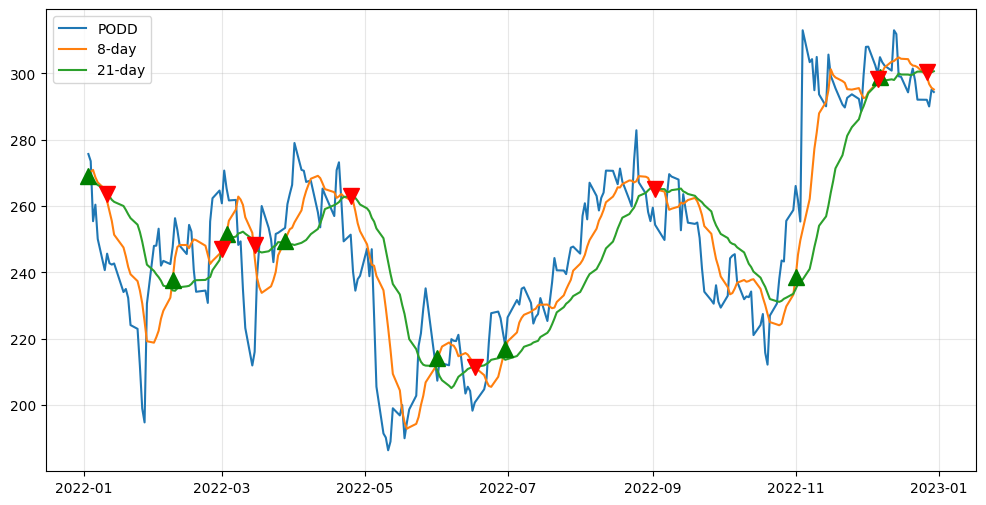

In [862]:
# Showing last year trends

plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(PODD1['close'], label = 'PODD') # actual value
plt.plot(PODD1['8-day'], label = '8-day') # 9-day average
plt.plot(PODD1['21-day'], label = '21-day') # 21-day average
plt.plot(PODD1.loc[PODD1.Signal == 1].index, PODD1['8-day'][PODD1.Signal == 1], '^',
         color = 'g', markersize = 12) # Buy it
plt.plot(PODD1.loc[PODD1.Signal == -1].index, PODD1['21-day'][PODD1.Signal == -1], 'v',
         color = 'r', markersize = 12) # Sell it
plt.grid(True, alpha = .3) # grid
plt.legend(loc=2);
plt.show()

##### ***3.2.1.3: How much money are we making?***

In [863]:
# Calculating the system return
PODD1['System_return'] = PODD1['Yes_Invest'] * PODD1['Return']

# Finding cumulative return
PODD1['Cum Return'] = PODD1['System_return'].cumsum()

# Return on strategy
PODD1['Strategy_return'] = (np.exp(PODD1['Cum Return'])-1)*PODD_invest

# Considering return on 1st day will be 0, plugging that in
PODD1.loc["2022-01-03",'Strategy_return'] = 0

# Investment status for this stock
PODD1['Investment status'] = PODD_invest + PODD1['Strategy_return']

# Printing the outputs neatly with required columns
PODD1 = PODD1.loc[first_days].copy().reset_index()
PODD1.drop(['open', 'high', 'low', 'adjclose', 'volume', 'ticker','Log Close'], axis = 1, inplace = True)
PODD1.rename(columns={"index": "First day"})

,First day,close,Return,8-day,21-day,Yes_Invest,Signal,System_return,Cum Return,Strategy_return,Investment status
0,2022-01-03,275.700012,0.035554,269.122509,267.163814,1,1.0,0.035554,0.035554,0.000000,39140.000000
1,2022-02-01,248.080002,0.000323,220.458752,239.442858,0,0.0,0.000000,-0.100208,-3732.033596,35407.966404
2,2022-03-01,260.839996,-0.014652,246.888748,247.040952,0,-1.0,-0.000000,-0.012774,-496.802205,38643.197795
3,2022-04-01,279.019989,0.046322,255.093750,248.283333,1,0.0,0.046322,-0.155332,-5631.044914,33508.955086
4,2022-05-02,247.169998,0.033655,248.461252,259.307144,0,0.0,0.000000,-0.267638,-9190.664067,29949.335933
5,2022-06-01,207.380005,-0.028990,214.192501,210.582381,1,1.0,-0.028990,-0.296628,-10046.438279,29093.561721
6,2022-07-01,226.460007,0.038349,219.212502,213.897621,1,0.0,0.038349,-0.321087,-10749.413980,28390.586020
7,2022-08-01,245.679993,-0.008592,242.615000,234.106668,1,0.0,-0.008592,-0.239626,-8339.864176,30800.135824
8,2022-09-01,259.529999,0.015767,265.371254,265.260954,1,0.0,0.015767,-0.184783,-6603.532029,32536.467971
9,2022-10-03,232.970001,0.015443,235.591248,250.377143,0,0.0,0.000000,-0.184783,-6603.532029,32536.467971


##### ***Conclusion: We are losing ~ $420 on this strategy***

#### ***3.2.2: EL***

In [864]:
# Using the data frame created earlier, create a new data frame to evaluate 8 day and 21 day moving averages

EL1 = df['PODD'].copy()
EL1['Log Close'] = np.log(EL1['close'])
EL1['Return'] = EL1['Log Close'].diff()
EL1['8-day'] = EL1['close'].rolling(8).mean().shift()
EL1['21-day'] = EL1['close'].rolling(21).mean().shift()
EL1.dropna(inplace=True)
EL1.head(n=10)

,open,high,low,close,adjclose,volume,ticker,Log Close,Return,8-day,21-day
2022-01-03,264.799988,276.209991,263.920013,275.700012,275.700012,395300,PODD,5.619313,0.035554,269.122509,267.163814
2022-01-04,276.779999,282.869995,268.309998,273.549988,273.549988,393400,PODD,5.611484,-0.007829,270.388760,266.614291
2022-01-05,272.010010,277.230011,255.029999,255.449997,255.449997,446200,PODD,5.543027,-0.068458,270.908756,267.108576
2022-01-06,252.789993,263.679993,249.500000,260.429993,260.429993,741900,PODD,5.562334,0.019307,268.682505,266.932861
2022-01-07,257.519989,260.690002,249.729996,250.080002,250.080002,435000,PODD,5.521781,-0.040553,267.141253,266.358098
2022-01-10,245.000000,245.979996,231.860001,240.699997,240.699997,647800,PODD,5.483551,-0.038230,265.130001,265.070003
2022-01-11,241.070007,247.149994,235.679993,245.669998,245.669998,429400,PODD,5.503989,0.020438,261.443750,263.746193
2022-01-12,250.529999,251.619995,242.270004,242.779999,242.779999,320000,PODD,5.492156,-0.011833,258.456249,262.943813
2022-01-13,242.029999,249.850006,236.160004,242.369995,242.369995,625900,PODD,5.490465,-0.001690,255.544998,261.904765
2022-01-14,240.690002,243.149994,235.759995,242.710007,242.710007,1017900,PODD,5.491867,0.001402,251.378746,261.288098


In [865]:
# Checking on investment if moving 8 day average is better than 21 day average

EL1['Yes_Invest'] = np.where(EL1['8-day'] > EL1['21-day'], 1, 0)
print(EL1['Yes_Invest'].value_counts()) 

1    141
0    110
Name: Yes_Invest, dtype: int64


##### ***3.2.2.1: Strategy on entering or leaving the market:***

In [866]:
EL1['Signal'] = EL1['Yes_Invest'].diff()
EL1.loc["2022-01-03",'Signal'] = 1 # Buy PODD on the first trading day basis signal

# Checking on how many days would we invest in the stock
print(EL1['Signal'].value_counts()) 

# 1 - Means invest - YES
# 0 - Means - Do nothing
# -1 Means - NO - move out

 0.0    235
 1.0      8
-1.0      8
Name: Signal, dtype: int64


In [867]:
# Checking on trading days

EL1[EL1['Signal'].isin([1,-1])]

,open,high,low,close,adjclose,volume,ticker,Log Close,Return,8-day,21-day,Yes_Invest,Signal
2022-01-03,264.799988,276.209991,263.920013,275.700012,275.700012,395300,PODD,5.619313,0.035554,269.122509,267.163814,1,1.0
2022-01-11,241.070007,247.149994,235.679993,245.669998,245.669998,429400,PODD,5.503989,0.020438,261.443750,263.746193,0,-1.0
2022-02-08,241.360001,248.410004,236.580002,247.690002,247.690002,287300,PODD,5.512178,0.021053,237.842501,234.592858,1,1.0
2022-03-01,261.600006,265.959991,258.209991,260.839996,260.839996,340300,PODD,5.563907,-0.014652,246.888748,247.040952,0,-1.0
2022-03-03,272.440002,278.670013,264.679993,265.390015,265.390015,1132900,PODD,5.581200,-0.019848,251.689997,249.562856,1,1.0
2022-03-15,213.130005,217.460007,210.500000,216.070007,216.070007,992300,PODD,5.375602,0.019205,244.597498,248.161902,0,-1.0
2022-03-28,250.649994,255.630005,248.460007,253.429993,253.429993,314700,PODD,5.535088,0.005897,249.626251,248.974761,1,1.0
2022-04-25,248.000000,255.490005,247.729996,251.389999,251.389999,295600,PODD,5.527006,0.008028,261.843750,263.026191,0,-1.0
2022-06-01,216.250000,220.119995,203.149994,207.380005,207.380005,520300,PODD,5.334553,-0.028990,214.192501,210.582381,1,1.0
2022-06-17,197.139999,206.639999,195.729996,200.800003,200.800003,480400,PODD,5.302309,0.012377,211.436251,211.472382,0,-1.0


##### ***3.2.1.2: Plotting the graph***

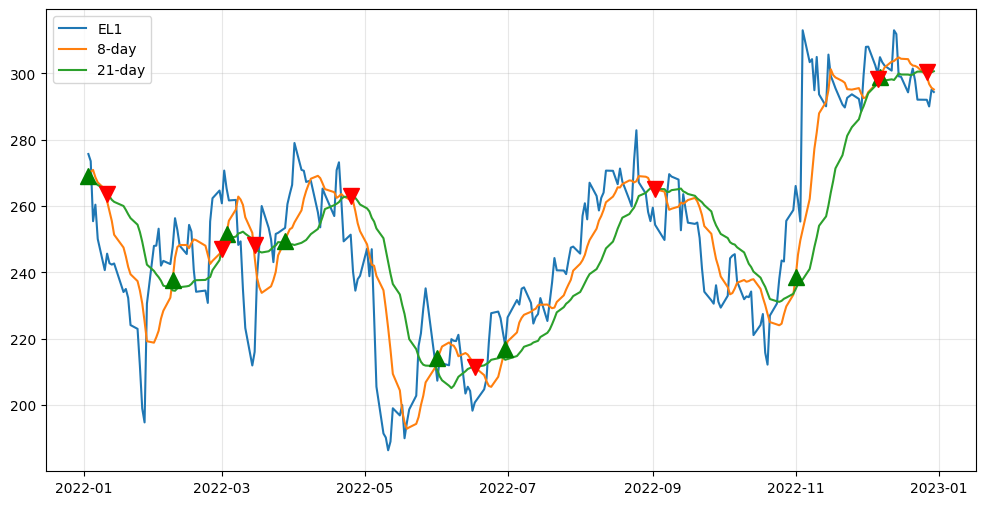

In [868]:
# Showing last year trends

plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(EL1['close'], label = 'EL1') # actual value
plt.plot(EL1['8-day'], label = '8-day') # 9-day average
plt.plot(EL1['21-day'], label = '21-day') # 21-day average
plt.plot(EL1.loc[EL1.Signal == 1].index, EL1['8-day'][EL1.Signal == 1], '^',
         color = 'g', markersize = 12) # Buy it
plt.plot(EL1.loc[EL1.Signal == -1].index, EL1['21-day'][EL1.Signal == -1], 'v',
         color = 'r', markersize = 12) # Sell it
plt.grid(True, alpha = .3) # grid
plt.legend(loc=2);
plt.show()

##### ***3.2.1.3: How much money are we making?***

In [869]:
# Calculating the system return
EL1['System_return'] = EL1['Yes_Invest'] * EL1['Return']

# Finding cumulative return
EL1['Cum Return'] = EL1['System_return'].cumsum()

# Return on strategy
EL1['Strategy_return'] = (np.exp(EL1['Cum Return'])-1)*EL_invest

# Considering return on 1st day will be 0, plugging that in
EL1.loc["2022-01-03",'Strategy_return'] = 0

# Investment status for this stock
EL1['Investment status'] = EL_invest + EL1['Strategy_return']

# Printing the outputs neatly with required columns
EL1 = EL1.loc[first_days].copy().reset_index()
EL1.drop(['open', 'high', 'low', 'adjclose', 'volume', 'ticker','Log Close'], axis = 1, inplace = True)
EL1.rename(columns={"index": "First day"})

,First day,close,Return,8-day,21-day,Yes_Invest,Signal,System_return,Cum Return,Strategy_return,Investment status
0,2022-01-03,275.700012,0.035554,269.122509,267.163814,1,1.0,0.035554,0.035554,0.000000,6230.000000
1,2022-02-01,248.080002,0.000323,220.458752,239.442858,0,0.0,0.000000,-0.100208,-594.036007,5635.963993
2,2022-03-01,260.839996,-0.014652,246.888748,247.040952,0,-1.0,-0.000000,-0.012774,-79.077101,6150.922899
3,2022-04-01,279.019989,0.046322,255.093750,248.283333,1,0.0,0.046322,-0.155332,-896.305821,5333.694179
4,2022-05-02,247.169998,0.033655,248.461252,259.307144,0,0.0,0.000000,-0.267638,-1462.898241,4767.101759
5,2022-06-01,207.380005,-0.028990,214.192501,210.582381,1,1.0,-0.028990,-0.296628,-1599.113707,4630.886293
6,2022-07-01,226.460007,0.038349,219.212502,213.897621,1,0.0,0.038349,-0.321087,-1711.007897,4518.992103
7,2022-08-01,245.679993,-0.008592,242.615000,234.106668,1,0.0,-0.008592,-0.239626,-1327.474548,4902.525452
8,2022-09-01,259.529999,0.015767,265.371254,265.260954,1,0.0,0.015767,-0.184783,-1051.098736,5178.901264
9,2022-10-03,232.970001,0.015443,235.591248,250.377143,0,0.0,0.000000,-0.184783,-1051.098736,5178.901264


##### ***Conclusion: We are losing ~ $67 on this strategy***

#### ***3.2.3: HES:***

In [870]:
# Using the data frame created earlier, create a new data frame to evaluate 8 day and 21 day moving averages

HES = df['PODD'].copy()
HES['Log Close'] = np.log(HES['close'])
HES['Return'] = HES['Log Close'].diff()
HES['8-day'] = HES['close'].rolling(8).mean().shift()
HES['21-day'] = HES['close'].rolling(21).mean().shift()
HES.dropna(inplace=True)
HES.head(n=10)

,open,high,low,close,adjclose,volume,ticker,Log Close,Return,8-day,21-day
2022-01-03,264.799988,276.209991,263.920013,275.700012,275.700012,395300,PODD,5.619313,0.035554,269.122509,267.163814
2022-01-04,276.779999,282.869995,268.309998,273.549988,273.549988,393400,PODD,5.611484,-0.007829,270.388760,266.614291
2022-01-05,272.010010,277.230011,255.029999,255.449997,255.449997,446200,PODD,5.543027,-0.068458,270.908756,267.108576
2022-01-06,252.789993,263.679993,249.500000,260.429993,260.429993,741900,PODD,5.562334,0.019307,268.682505,266.932861
2022-01-07,257.519989,260.690002,249.729996,250.080002,250.080002,435000,PODD,5.521781,-0.040553,267.141253,266.358098
2022-01-10,245.000000,245.979996,231.860001,240.699997,240.699997,647800,PODD,5.483551,-0.038230,265.130001,265.070003
2022-01-11,241.070007,247.149994,235.679993,245.669998,245.669998,429400,PODD,5.503989,0.020438,261.443750,263.746193
2022-01-12,250.529999,251.619995,242.270004,242.779999,242.779999,320000,PODD,5.492156,-0.011833,258.456249,262.943813
2022-01-13,242.029999,249.850006,236.160004,242.369995,242.369995,625900,PODD,5.490465,-0.001690,255.544998,261.904765
2022-01-14,240.690002,243.149994,235.759995,242.710007,242.710007,1017900,PODD,5.491867,0.001402,251.378746,261.288098


In [871]:
# Checking on investment if moving 8 day average is better than 21 day average

HES['Yes_Invest'] = np.where(HES['8-day'] > HES['21-day'], 1, 0)
print(HES['Yes_Invest'].value_counts()) 

1    141
0    110
Name: Yes_Invest, dtype: int64


##### ***3.2.3.1: Strategy on entering or leaving the market:***

In [872]:
HES['Signal'] = HES['Yes_Invest'].diff()
HES.loc["2022-01-03",'Signal'] = 1 # Buy PODD on the first trading day basis signal

# Checking on how many days would we invest in the stock
print(HES['Signal'].value_counts()) 

# 1 - Means invest - YES
# 0 - Means - Do nothing
# -1 Means - NO - move out

 0.0    235
 1.0      8
-1.0      8
Name: Signal, dtype: int64


In [873]:
# Checking on trading days

HES[HES['Signal'].isin([1,-1])]

,open,high,low,close,adjclose,volume,ticker,Log Close,Return,8-day,21-day,Yes_Invest,Signal
2022-01-03,264.799988,276.209991,263.920013,275.700012,275.700012,395300,PODD,5.619313,0.035554,269.122509,267.163814,1,1.0
2022-01-11,241.070007,247.149994,235.679993,245.669998,245.669998,429400,PODD,5.503989,0.020438,261.443750,263.746193,0,-1.0
2022-02-08,241.360001,248.410004,236.580002,247.690002,247.690002,287300,PODD,5.512178,0.021053,237.842501,234.592858,1,1.0
2022-03-01,261.600006,265.959991,258.209991,260.839996,260.839996,340300,PODD,5.563907,-0.014652,246.888748,247.040952,0,-1.0
2022-03-03,272.440002,278.670013,264.679993,265.390015,265.390015,1132900,PODD,5.581200,-0.019848,251.689997,249.562856,1,1.0
2022-03-15,213.130005,217.460007,210.500000,216.070007,216.070007,992300,PODD,5.375602,0.019205,244.597498,248.161902,0,-1.0
2022-03-28,250.649994,255.630005,248.460007,253.429993,253.429993,314700,PODD,5.535088,0.005897,249.626251,248.974761,1,1.0
2022-04-25,248.000000,255.490005,247.729996,251.389999,251.389999,295600,PODD,5.527006,0.008028,261.843750,263.026191,0,-1.0
2022-06-01,216.250000,220.119995,203.149994,207.380005,207.380005,520300,PODD,5.334553,-0.028990,214.192501,210.582381,1,1.0
2022-06-17,197.139999,206.639999,195.729996,200.800003,200.800003,480400,PODD,5.302309,0.012377,211.436251,211.472382,0,-1.0


##### ***3.2.3.2: Plotting the graph***

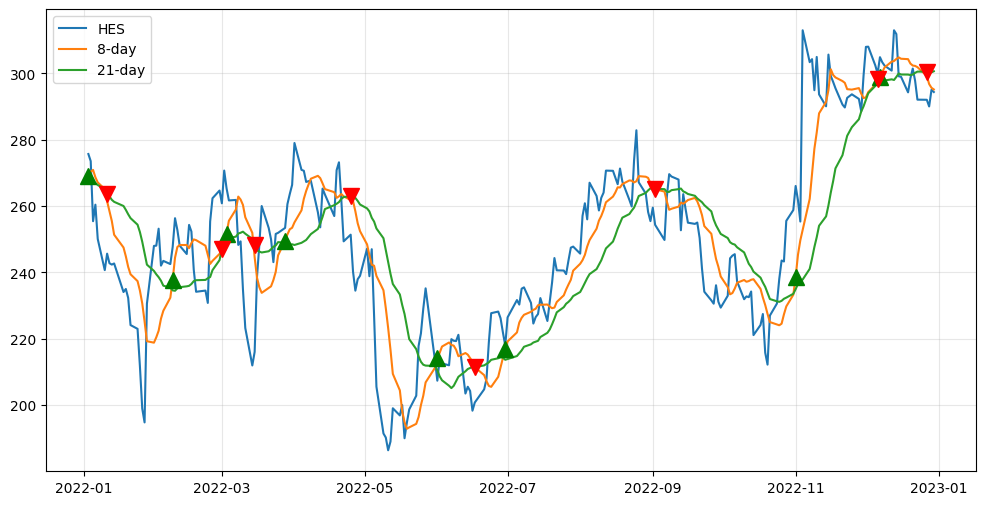

In [874]:
# Showing last year trends

plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(HES['close'], label = 'HES') # actual value
plt.plot(HES['8-day'], label = '8-day') # 9-day average
plt.plot(HES['21-day'], label = '21-day') # 21-day average
plt.plot(HES.loc[HES.Signal == 1].index, HES['8-day'][HES.Signal == 1], '^',
         color = 'g', markersize = 12) # Buy it
plt.plot(HES.loc[HES.Signal == -1].index, HES['21-day'][HES.Signal == -1], 'v',
         color = 'r', markersize = 12) # Sell it
plt.grid(True, alpha = .3) # grid
plt.legend(loc=2);
plt.show()

##### ***3.2.3.3: How much money are we making?***

In [875]:
# Calculating the system return
HES['System_return'] = HES['Yes_Invest'] * HES['Return']

# Finding cumulative return
HES['Cum Return'] = HES['System_return'].cumsum()

# Return on strategy
HES['Strategy_return'] = (np.exp(HES['Cum Return'])-1)*HES_invest

# Considering return on 1st day will be 0, plugging that in
HES.loc["2022-01-03",'Strategy_return'] = 0

# Investment status for this stock
HES['Investment status'] = HES_invest + HES['Strategy_return']

# Printing the outputs neatly with required columns
HES = HES.loc[first_days].copy().reset_index()
HES.drop(['open', 'high', 'low', 'adjclose', 'volume', 'ticker','Log Close'], axis = 1, inplace = True)
HES.rename(columns={"index": "First day"})

,First day,close,Return,8-day,21-day,Yes_Invest,Signal,System_return,Cum Return,Strategy_return,Investment status
0,2022-01-03,275.700012,0.035554,269.122509,267.163814,1,1.0,0.035554,0.035554,0.000000,54630.000000
1,2022-02-01,248.080002,0.000323,220.458752,239.442858,0,0.0,0.000000,-0.100208,-5209.018787,49420.981213
2,2022-03-01,260.839996,-0.014652,246.888748,247.040952,0,-1.0,-0.000000,-0.012774,-693.416057,53936.583943
3,2022-04-01,279.019989,0.046322,255.093750,248.283333,1,0.0,0.046322,-0.155332,-7859.580574,46770.419426
4,2022-05-02,247.169998,0.033655,248.461252,259.307144,0,0.0,0.000000,-0.267638,-12827.950383,41802.049617
5,2022-06-01,207.380005,-0.028990,214.192501,210.582381,1,1.0,-0.028990,-0.296628,-14022.404782,40607.595218
6,2022-07-01,226.460007,0.038349,219.212502,213.897621,1,0.0,0.038349,-0.321087,-15003.589314,39626.410686
7,2022-08-01,245.679993,-0.008592,242.615000,234.106668,1,0.0,-0.008592,-0.239626,-11640.438936,42989.561064
8,2022-09-01,259.529999,0.015767,265.371254,265.260954,1,0.0,0.015767,-0.184783,-9216.938037,45413.061963
9,2022-10-03,232.970001,0.015443,235.591248,250.377143,0,0.0,0.000000,-0.184783,-9216.938037,45413.061963


##### ***Conclusion: We are losing ~ $586 on this strategy***

#### ***Calculating portfolio return***

In [881]:
Portfolio = pd.DataFrame()

# Create columns with investment
Portfolio['PODD Investment'] = PODD1['Investment status']
Portfolio['EL Investment'] = EL1['Investment status']
Portfolio['HES Investment'] = HES['Investment status']

# Total value
Portfolio['Total Investment'] = PODD1['Investment status'] + EL1['Investment status'] + HES['Investment status']

# Create columns with returns
Portfolio['PODD Return'] = PODD1['Strategy_return']
Portfolio['EL Return'] = EL1['Strategy_return']
Portfolio['HES Return'] = HES['Strategy_return']

# Total return
Portfolio['Total Return'] = PODD1['Strategy_return'] + EL1['Strategy_return'] + HES['Strategy_return']

# Printing outputs
Portfolio = Portfolio.loc[first_days].copy().reset_index()
Portfolio.rename(columns={"index": "First day"},inplace = True)
Portfolio


,PODD Investment,EL Investment,HES Investment,Total Investment,PODD Return,EL Return,HES Return,Total Return
0,39140.000000,6230.000000,54630.000000,100000.000000,0.000000,0.000000,0.000000,0.000000
1,35407.966404,5635.963993,49420.981213,90464.911611,-3732.033596,-594.036007,-5209.018787,-9535.088389
2,38643.197795,6150.922899,53936.583943,98730.704637,-496.802205,-79.077101,-693.416057,-1269.295363
3,33508.955086,5333.694179,46770.419426,85613.068691,-5631.044914,-896.305821,-7859.580574,-14386.931309
4,29949.335933,4767.101759,41802.049617,76518.487309,-9190.664067,-1462.898241,-12827.950383,-23481.512691
5,29093.561721,4630.886293,40607.595218,74332.043233,-10046.438279,-1599.113707,-14022.404782,-25667.956767
6,28390.586020,4518.992103,39626.410686,72535.988809,-10749.413980,-1711.007897,-15003.589314,-27464.011191
7,30800.135824,4902.525452,42989.561064,78692.222339,-8339.864176,-1327.474548,-11640.438936,-21307.777661
8,32536.467971,5178.901264,45413.061963,83128.431197,-6603.532029,-1051.098736,-9216.938037,-16871.568803
9,32536.467971,5178.901264,45413.061963,83128.431197,-6603.532029,-1051.098736,-9216.938037,-16871.568803


#### ***Conclusion: We lose $ 1072 in total with this strategy.***

## ***3.3: Momentum trading strategy for the entire MPT portfolio***

In [896]:
# Creating a data frame to store results at portfolio level
Portfolio1 = pd.DataFrame()

# Storing Returns
Portfolio1['PODD Return'] = PODD1['Return']
Portfolio1['EL Return'] = EL1['Return']
Portfolio1['HES Return'] = HES['Return']

# Storing Signals for indication
Portfolio1['PODD Signal'] = PODD1['Signal']
Portfolio1['EL Signal'] = EL1['Signal']
Portfolio1['HES Signal'] = HES['Signal']

# Determine buying and selling at portfolio level by creating signal sum
Portfolio1['Portfolio Signal'] = PODD1['Signal'] + EL1['Signal'] + HES['Signal']

# Creating indicator colum for signal
Portfolio1['Signal'] = np.where(Portfolio1['Portfolio Signal'] > 0, 1, np.where(Portfolio1['Portfolio Signal'] < 0, -1, 0))

# Calculate cumulative signal to figure out when money is in and out
Portfolio1['Signal_Cum'] = Portfolio1['Signal'].cumsum()

# Make a column to check on investment
Portfolio1['Investment'] = np.where(Portfolio1['Signal_Cum'] > 0, 1, np.where(Portfolio1['Signal_Cum'] < 0, 0, 0))

# Calculating return for the portfolio
Portfolio1['PODD Return'] = Portfolio1['Investment'] * Portfolio1['PODD Return']
Portfolio1['EL Return'] = Portfolio1['Investment'] * Portfolio1['EL Return']
Portfolio1['HES Return'] = Portfolio1['Investment'] * Portfolio1['HES Return']

# Calculate sumulative return
Portfolio1['PODD Cum Return'] = Portfolio1['PODD Return'].cumsum()
Portfolio1['EL Cum Return'] = Portfolio1['EL Return'].cumsum()
Portfolio1['HES Cum Return'] = Portfolio1['HES Return'].cumsum()

# Converting into monetary value
Portfolio1['PODD Strategy Return'] = (np.exp(Portfolio1['PODD Cum Return'])-1)*PODD_invest
Portfolio1['EL Strategy Return'] = (np.exp(Portfolio1['EL Cum Return'])-1)*EL_invest
Portfolio1['HES Strategy Return'] = (np.exp(Portfolio1['HES Cum Return'])-1)*HES_invest

# Setting first day return to 0 as done earlier
Portfolio1.loc["2022-01-03",'PODD Strategy Return'] = 0
Portfolio1.loc["2022-01-03",'EL Strategy Return'] = 0
Portfolio1.loc["2022-01-03",'HES Strategy Return'] = 0

# Calculating total investment for the portfolio
Portfolio1['PODD Investment'] = PODD_invest + Portfolio1['PODD Strategy Return']
Portfolio1['EL Investment'] = EL_invest + Portfolio1['EL Strategy Return']
Portfolio1['HES Investment'] = HES_invest + Portfolio1['HES Strategy Return']


In [898]:
# Calculate total value of the portfolio
Portfolio1['Total Investment'] = Portfolio1['PODD Investment'] + Portfolio1['EL Investment'] + Portfolio1['HES Investment']

# Calculating total return of the portfolio
Portfolio1['Total Return'] = Portfolio1['PODD Strategy Return'] + Portfolio1['EL Strategy Return'] + Portfolio1['HES Strategy Return']

In [910]:
# Printing out the final table with required details
# Portfolio2 = Portfolio1.loc[first_days].copy().reset_index()
Portfolio2 =  Portfolio1.copy().reset_index()
Portfolio2.rename(columns={"index": "First day"}, inplace = True)
Portfolio2

,First day,PODD Return,EL Return,HES Return,PODD Signal,EL Signal,HES Signal,Portfolio Signal,Signal,Signal_Cum,...,EL Cum Return,HES Cum Return,PODD Strategy Return,EL Strategy Return,HES Strategy Return,PODD Investment,EL Investment,HES Investment,Total Investment,Total Return
0,0,0.035554,0.035554,0.035554,1.0,1.0,1.0,3.0,1.0,1.0,...,0.035554,0.035554,1416.613601,225.485507,1977.250920,40556.613601,6455.485507,56607.250920,103619.350027,3619.350027
1,1,0.000323,0.000323,0.000323,0.0,0.0,0.0,0.0,0.0,1.0,...,0.035876,0.035876,1429.696679,227.567969,1995.511741,40569.696679,6457.567969,56625.511741,103652.776389,3652.776389
2,2,-0.000000,-0.000000,-0.000000,-1.0,-1.0,-1.0,-3.0,-1.0,0.0,...,0.035876,0.035876,1429.696679,227.567969,1995.511741,40569.696679,6457.567969,56625.511741,103652.776389,3652.776389
3,3,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.035876,0.035876,1429.696679,227.567969,1995.511741,40569.696679,6457.567969,56625.511741,103652.776389,3652.776389
4,4,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.035876,0.035876,1429.696679,227.567969,1995.511741,40569.696679,6457.567969,56625.511741,103652.776389,3652.776389
5,5,-0.028990,-0.028990,-0.028990,1.0,1.0,1.0,3.0,1.0,1.0,...,0.006886,0.006886,270.455610,43.049015,377.490802,39410.455610,6273.049015,55007.490802,100690.995428,690.995428
6,6,0.038349,0.038349,0.038349,0.0,0.0,0.0,0.0,0.0,1.0,...,0.045235,0.045235,1811.142251,288.283501,2527.917761,40951.142251,6518.283501,57157.917761,104627.343513,4627.343513
7,7,-0.008592,-0.008592,-0.008592,0.0,0.0,0.0,0.0,0.0,1.0,...,0.036643,0.036643,1460.791785,232.517446,2038.913010,40600.791785,6462.517446,56668.913010,103732.222241,3732.222241
8,8,0.015767,0.015767,0.015767,0.0,0.0,0.0,0.0,0.0,1.0,...,0.052410,0.052410,2106.030423,335.221501,2939.510526,41246.030423,6565.221501,57569.510526,105380.762449,5380.762449
9,9,0.015443,0.015443,0.015443,0.0,0.0,0.0,0.0,0.0,1.0,...,0.067852,0.067852,2747.916363,437.391899,3835.428485,41887.916363,6667.391899,58465.428485,107020.736747,7020.736747


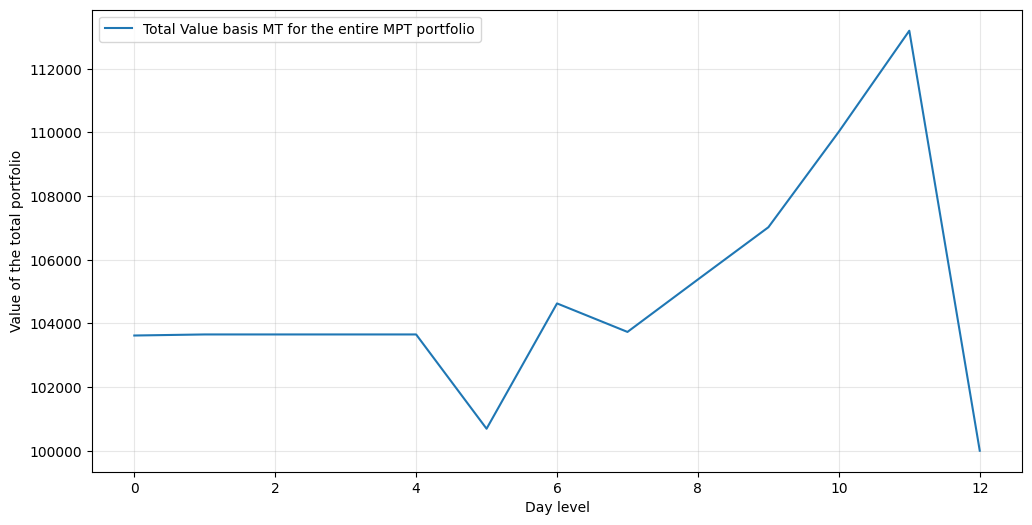

In [927]:
# Plotting MT investment for total MPT stock 

plt.plot(Portfolio2['Total Investment'], label='Total Value basis MT for the entire MPT portfolio')
plt.legend(loc = 2 )
plt.xlabel('Day level') 
plt.ylabel('Value of the total portfolio') 
plt.grid(True, alpha=.3) 
plt.show()

#### ***Conclusion: We gain $ 13195 with this strategy.***

## ***3.4: Buy-and-Hold strategy for the S&P 500 index***

In [918]:
# Create a new data frame to store data for S&P 500 index Buy and Hold Strategy
Buy_Hold2 = pd.DataFrame()

# Taking data for performace of stocks using GSPC index
GSPC = si.get_data('^GSPC',start_date = '1/1/2022',end_date='1/1/2023',interval='1d')

# Storing the prices in our new data frame
Buy_Hold2['GSPC Price'] = GSPC['close']

# Price on 1st day of trading
GSPC_Buy = Buy_Hold2.loc['2022-01-03', 'GSPC Price']

# No. of shares
GSPC_shares = invest_fund / GSPC_Buy

# Total amount invested
Buy_Hold2['GSPC Investment'] = Buy_Hold2['GSPC Price'] * GSPC_shares

# Calculate total return for the portfolio
Buy_Hold2['Return'] = Buy_Hold2['GSPC Investment'] - invest_fund

In [919]:
# Printing the data frame with required columns
Buy_Hold2 = Buy_Hold2.loc[first_days].copy().reset_index()
Buy_Hold2

,index,GSPC Price,GSPC Investment,Return
0,2022-01-03,4796.560059,100000.000000,0.000000
1,2022-02-01,4546.540039,94787.514042,-5212.485958
2,2022-03-01,4306.259766,89778.084982,-10221.915018
3,2022-04-01,4545.859863,94773.333551,-5226.666449
4,2022-05-02,4155.379883,86632.499793,-13367.500207
5,2022-06-01,4101.229980,85503.567773,-14496.432227
6,2022-07-01,3825.330078,79751.530918,-20248.469082
7,2022-08-01,4118.629883,85866.325711,-14133.674289
8,2022-09-01,3966.850098,82701.979110,-17298.020890
9,2022-10-03,3678.429932,76688.916363,-23311.083637


#### ***Conclusion: We are losing $ 15010 with this strategy***

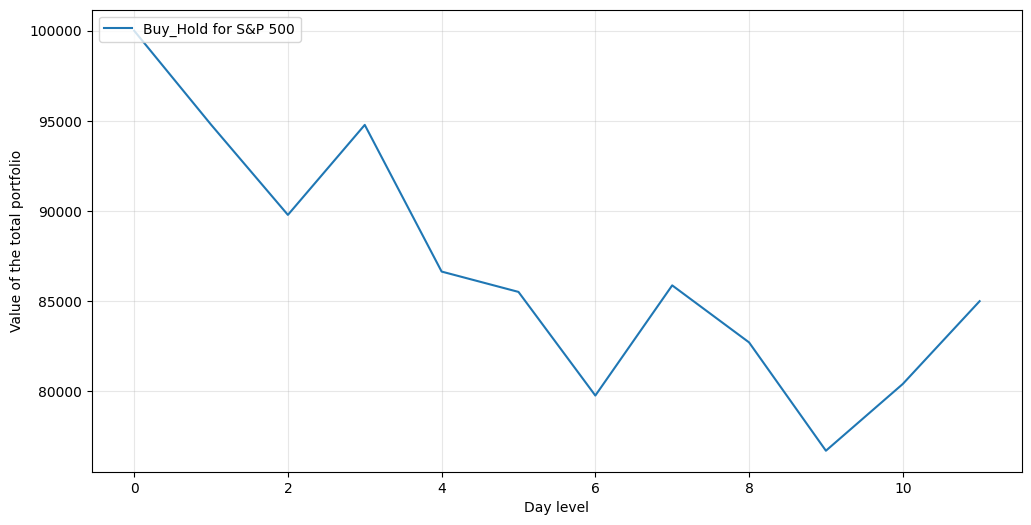

In [928]:
# Plotting GSPC investment

plt.plot(Buy_Hold2['GSPC Investment'], label='Buy_Hold for S&P 500') 
plt.legend(loc = 2 )
plt.xlabel('Day level') 
plt.ylabel('Value of the total portfolio') 
plt.grid(True, alpha=.3) 
plt.show()

## ***3.5: Plot Comparing the Investment Strategies***

#### ***Plotting all the four strategies in one single plot as below:***

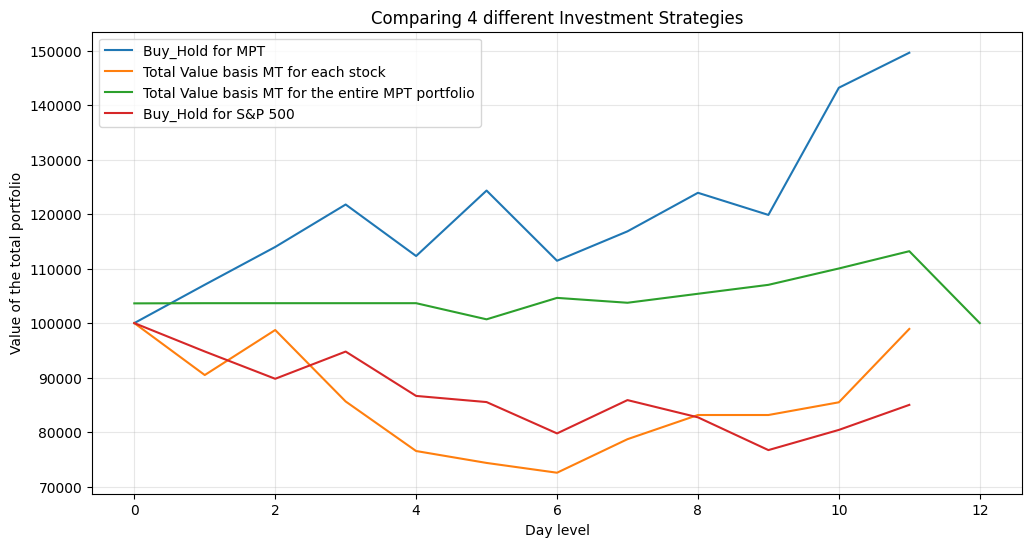

In [925]:
# Plot all the four strategies on a single plot

# Plotting MPT investment
plt.plot(Buy_Hold["Portfolio Value"], label='Buy_Hold for MPT') 

# Plotting MT investment for each stock
plt.plot(Portfolio['Total Investment'], label='Total Value basis MT for each stock') 

# Plotting MT investment for each MPT stock 
plt.plot(Portfolio2['Total Investment'], label='Total Value basis MT for the entire MPT portfolio')

# Plotting GSPC investment
plt.plot(Buy_Hold2['GSPC Investment'], label='Buy_Hold for S&P 500') 

# Pretty graphs
plt.legend(loc= 2 ) # legend

plt.xlabel('Day level') 
plt.ylabel('Value of the total portfolio') 
plt.title('Comparing 4 different Investment Strategies') 
plt.grid(True, alpha=.3) 
plt.show()

## ***3.6: Discussion and Comparison of the Investment Strategies***

# ***4 - Conclusion***

## ***4.1: Thoughts and Insights***

## ***4.2: Individual Contributions***